In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np

The following function will generate a circuit that satisfies the Bernstein-Vazirani promise for a given string $s$

In [5]:
def bv_query(s):
    # Create a quantum circuit implementing a query gate for the
    # Bernstein-Vazirani problem.

    qc = QuantumCircuit(len(s) + 1)
    for index, bit in enumerate(reversed(s)):
        if bit == "1":
            qc.cx(index, len(s))
    return qc

The following function creates the Deutsch-Josza circuit, using the quantum circuit implementation of the query gate as an argument

In [12]:
def compile_circuit(f: QuantumCircuit):
    n = f.num_qubits - 1

    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.barrier()
    qc.h(range(n + 1))

    qc.barrier()
    qc.compose(f, inplace=True)
    qc.barrier()
    
    qc.h(range(n))

    qc.measure(range(n), range(n))

    return qc

In [10]:
def bv_algorithm(function: QuantumCircuit):
    qc = compile_circuit(function)
    result = AerSimulator().run(qc, shots=1, memory=True).result()

    display(qc.draw("mpl"))

    return result.get_memory()[0]

In [16]:
f = bv_query('110100001')

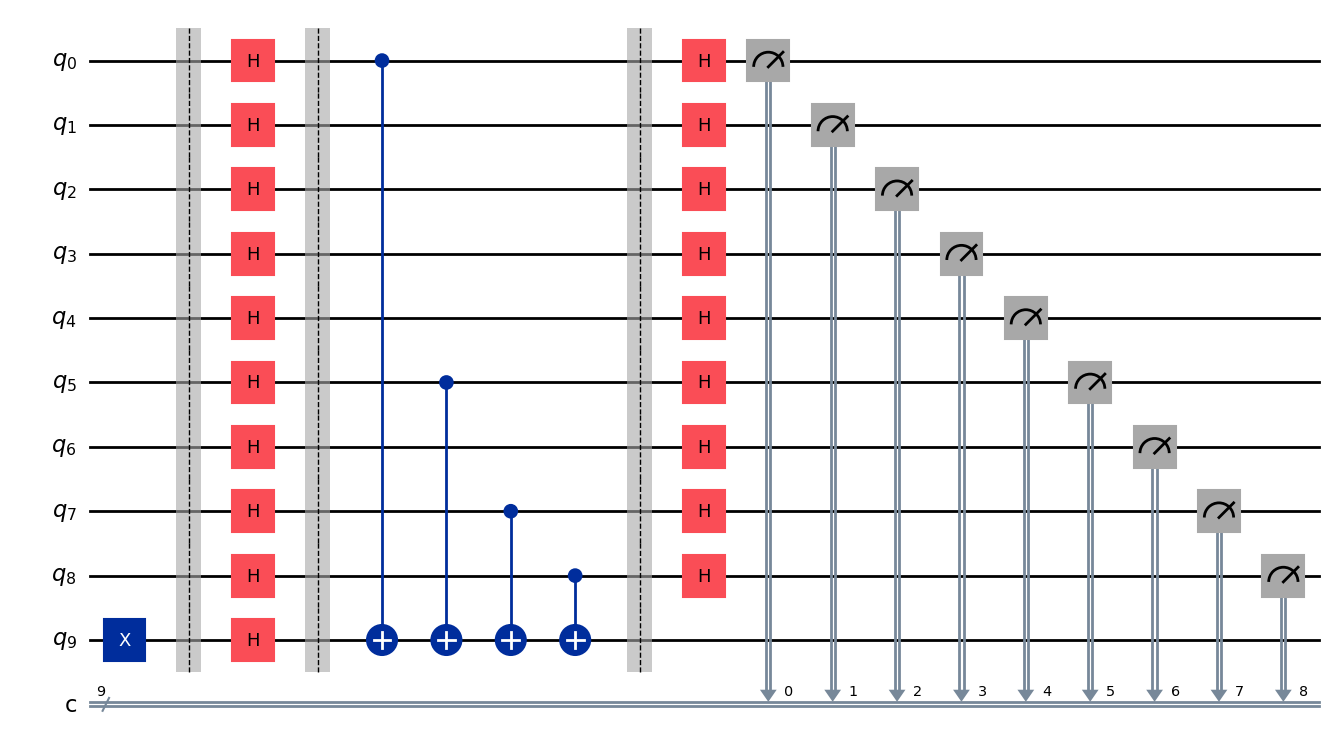

'110100001'

In [17]:
display(bv_algorithm(f))